<a href="https://colab.research.google.com/github/jeonghojo00/HousingPricePrediction/blob/main/HousingPrice_Prophet_byZip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

## Step 0. Import dataset

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import numpy as np
colab_notebook = "/content/drive/My Drive/Colab Notebooks/"
zillow_dataset = "Zillow/AllHomesZipPrices.csv"
df = pd.read_csv(colab_notebook+zillow_dataset)

prophet_df_dict = dict()

In [7]:
def get_city_df(df, state, city):
    state_df = df[df['state'] == state]
    city_df = state_df[state_df['city'] == city]

    return city_df

In [8]:
city_df = get_city_df(df, 'TX', 'Houston')
print(city_df.head())
zipCodes = city_df['zip'].unique()
print("Number of Zip codes in Houston, TX: ", len(zipCodes))

              ds    zip     city state        y
1208  1996-01-31  77084  Houston    TX  98008.0
1209  1996-02-29  77084  Houston    TX  98035.0
1210  1996-03-31  77084  Houston    TX  97963.0
1211  1996-04-30  77084  Houston    TX  97960.0
1212  1996-05-31  77084  Houston    TX  97916.0
Number of Zip codes in Houston, TX:  100


In [9]:
city_df.loc[:, ('ds', 'y')]

,ds,y
1208,1996-01-31,98008.0
1209,1996-02-29,98035.0
1210,1996-03-31,97963.0
1211,1996-04-30,97960.0
1212,1996-05-31,97916.0
...,...,...
1350841,2020-10-31,515310.0
1350842,2020-11-30,516523.0
1350843,2020-12-31,515837.0
1350844,2021-01-31,516256.0


In [11]:
testZip = zipCodes[0]
testZip

77084

In [13]:
zip_df = city_df[df['zip']==testZip].loc[:,('ds', 'y')]
md = Prophet(interval_width=0.95)
model = md.fit(zip_df)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,ds,y
1208,1996-01-31,98008.0
1209,1996-02-29,98035.0
1210,1996-03-31,97963.0
1211,1996-04-30,97960.0
1212,1996-05-31,97916.0
...,...,...
1505,2020-10-31,198147.0
1506,2020-11-30,200405.0
1507,2020-12-31,202660.0
1508,2021-01-31,205355.0


In [ ]:
for i in range(len(zipCodes)):
    zip = zipCodes[i]
    zip_df = city_df[df['zip']==zip]
    zip_df = zip_df.loc[:, ('ds', 'y')]
    m1 = Prophet(interval_width=0.95)
    model1 = m1.fit(zip_df)



,ds,zip,city,state,y
1208,1996-01-31,77084,Houston,TX,98008.0
1209,1996-02-29,77084,Houston,TX,98035.0
1210,1996-03-31,77084,Houston,TX,97963.0
1211,1996-04-30,77084,Houston,TX,97960.0
1212,1996-05-31,77084,Houston,TX,97916.0
...,...,...,...,...,...
1505,2020-10-31,77084,Houston,TX,198147.0
1506,2020-11-30,77084,Houston,TX,200405.0
1507,2020-12-31,77084,Houston,TX,202660.0
1508,2021-01-31,77084,Houston,TX,205355.0


## Step 1. Make dictionary with PD DataFrames to train

In [ ]:
for zipCode in df_dict:
    df = pd.DataFrame.from_dict(df_dict[zipCode])
    df = df.fillna(method='ffill')
    df = df.fillna(method='bfill')
    df.reset_index(inplace=True)
    
    colList = list(df.columns)
    for i in range(1, len(colList)):
        partial_df = df[['index', colList[i]]]
        partial_df = partial_df.rename(columns={"index": "ds", colList[i]: "y"})
        partial_df['ds'] = pd.to_datetime(partial_df['ds'].astype(str) + '-01')
        if i == 1:
            prophet_df_dict[zipCode] = dict()
        prophet_df_dict[zipCode][colList[i]] = partial_df

In [ ]:
testZip = list(prophet_df_dict.keys())[0]
homeTypes = list(prophet_df_dict[testZip].keys())

## Step 2. Train the Model

In [ ]:
m1 = Prophet(interval_width=0.95)
m2 = Prophet(interval_width=0.95)
m3 = Prophet(interval_width=0.95)
m4 = Prophet(interval_width=0.95)
m5 = Prophet(interval_width=0.95)
m6 = Prophet(interval_width=0.95)
m7 = Prophet(interval_width=0.95)
m8 = Prophet(interval_width=0.95)

In [ ]:
model1 = m1.fit(prophet_df_dict[testZip][homeTypes[0]])
model2 = m2.fit(prophet_df_dict[testZip][homeTypes[1]])
model3 = m3.fit(prophet_df_dict[testZip][homeTypes[2]])
model4 = m4.fit(prophet_df_dict[testZip][homeTypes[3]])
model5 = m5.fit(prophet_df_dict[testZip][homeTypes[4]])
model6 = m6.fit(prophet_df_dict[testZip][homeTypes[5]])
model7 = m7.fit(prophet_df_dict[testZip][homeTypes[6]])
model8 = m8.fit(prophet_df_dict[testZip][homeTypes[7]])

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to overr

## Step 3. Predict the future

In [ ]:
future1 = model1.make_future_dataframe(periods=24, freq='MS') #freq changes frequency of dates. Default Daily

In [ ]:
prophet_future1 = model1.predict(future1)
prophet_future2 = model2.predict(future1)
prophet_future3 = model3.predict(future1)
prophet_future4 = model4.predict(future1)
prophet_future5 = model5.predict(future1)
prophet_future6 = model6.predict(future1)
prophet_future7 = model7.predict(future1)
prophet_future8 = model8.predict(future1)

## Step 4. Plot the fitted value and the forecast

In [ ]:
print(homeTypes)

['5Bed', '4Bed', '3Bed', '2Bed', '1Bed', 'SingleFamily', 'Condo', 'HomeValue']


In [ ]:
prophet_future2

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-01-01,263525.447822,256547.732623,270897.463401,263525.447822,263525.447822,342.747127,342.747127,342.747127,342.747127,342.747127,342.747127,0.0,0.0,0.0,263868.194950
1,1996-02-01,263482.309448,256481.699287,270375.224836,263482.309448,263482.309448,-289.908658,-289.908658,-289.908658,-289.908658,-289.908658,-289.908658,0.0,0.0,0.0,263192.400791
2,1996-03-01,263441.954195,255538.550385,269506.306782,263441.954195,263441.954195,-1122.486990,-1122.486990,-1122.486990,-1122.486990,-1122.486990,-1122.486990,0.0,0.0,0.0,262319.467206
3,1996-04-01,263398.815822,256367.457768,270739.721195,263398.815822,263398.815822,55.151660,55.151660,55.151660,55.151660,55.151660,55.151660,0.0,0.0,0.0,263453.967482
4,1996-05-01,263357.069008,256736.173751,271408.272223,263357.069008,263357.069008,817.526866,817.526866,817.526866,817.526866,817.526866,817.526866,0.0,0.0,0.0,264174.595875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,2022-10-01,508086.622195,489170.396705,529744.834153,488311.074786,527822.074854,735.034369,735.034369,735.034369,735.034369,735.034369,735.034369,0.0,0.0,0.0,508821.656564
322,2022-11-01,509081.417718,488852.436779,530697.972028,488072.217414,530622.951167,755.946399,755.946399,755.946399,755.946399,755.946399,755.946399,0.0,0.0,0.0,509837.364117
323,2022-12-01,510044.123063,488776.463254,533208.994497,487762.842284,533149.175344,713.706706,713.706706,713.706706,713.706706,713.706706,713.706706,0.0,0.0,0.0,510757.829769
324,2023-01-01,511038.918587,487324.420930,537067.020575,487581.939022,535792.240174,751.117761,751.117761,751.117761,751.117761,751.117761,751.117761,0.0,0.0,0.0,511790.036348


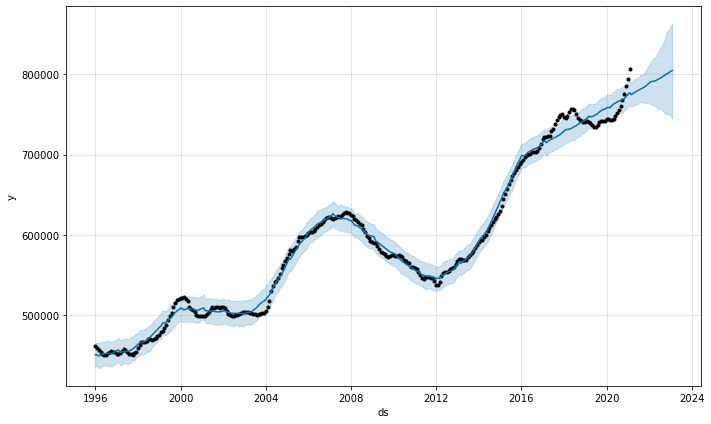

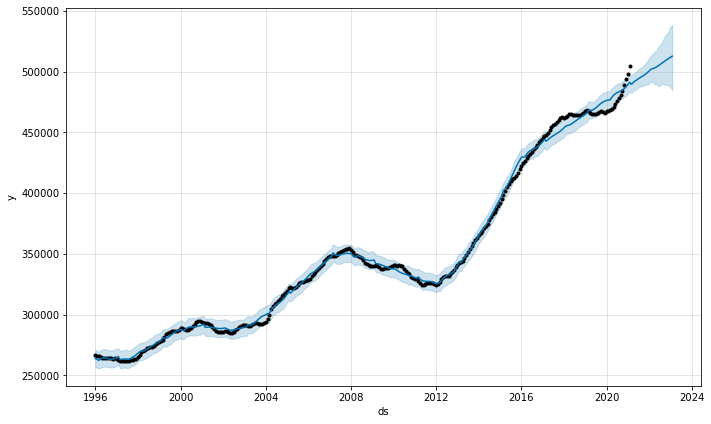

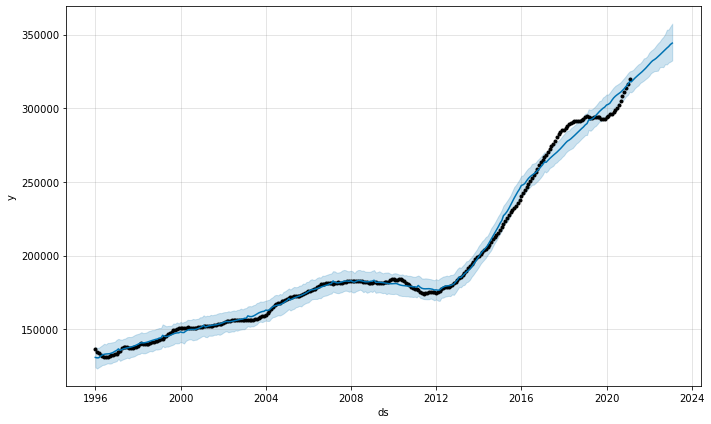

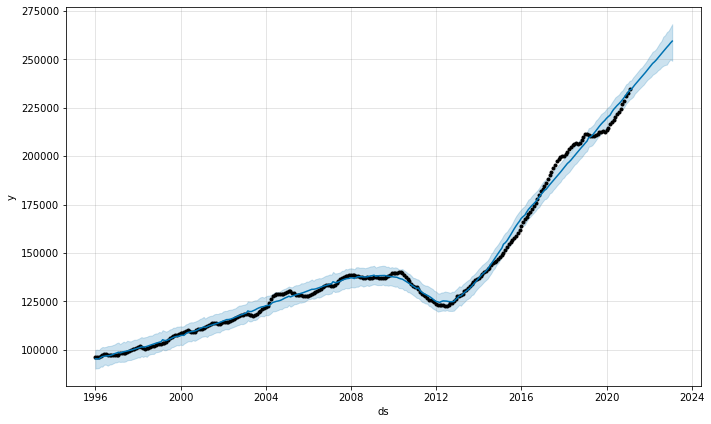

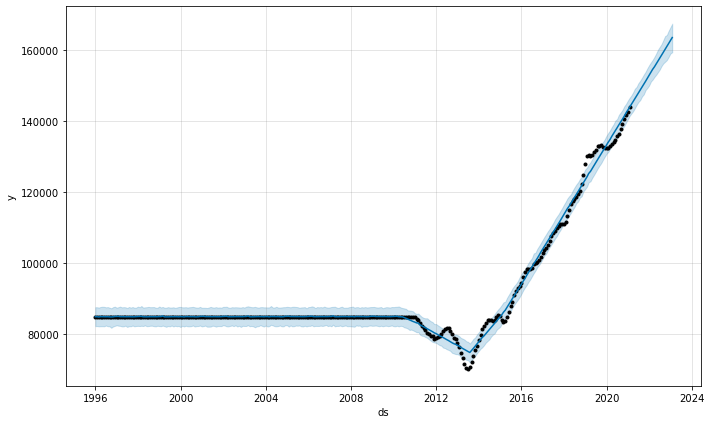

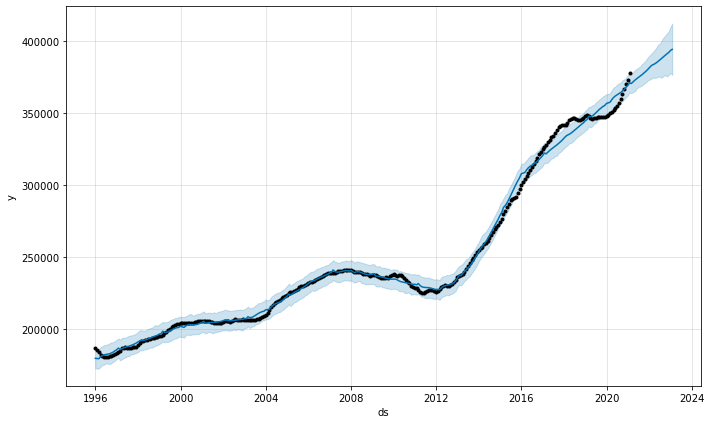

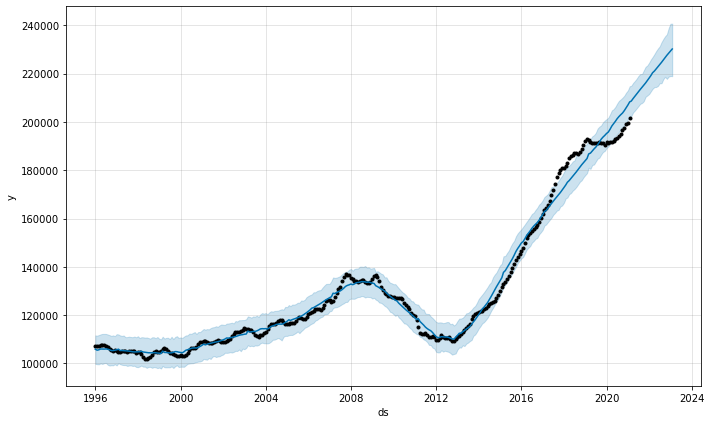

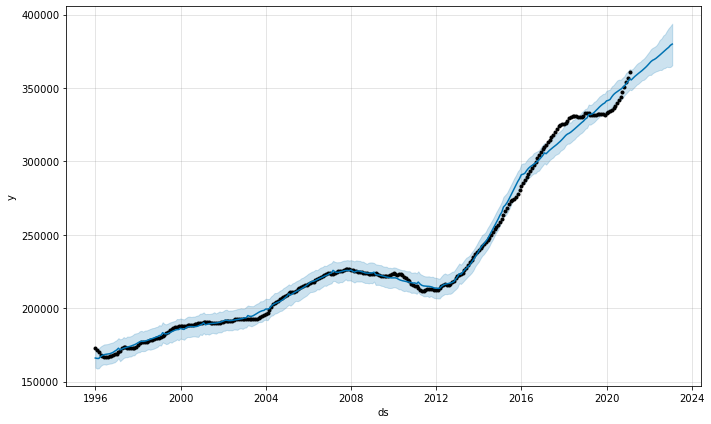

In [ ]:
model1.plot(prophet_future1);
model2.plot(prophet_future2);
model3.plot(prophet_future3);
model4.plot(prophet_future4);
model5.plot(prophet_future5);
model6.plot(prophet_future6);
model7.plot(prophet_future7);
model8.plot(prophet_future8);


## Train until 2019-02 and forecast for 2019-03~2021-02

In [ ]:
test_set = prophet_df_dict[testZip][homeTypes[7]]

In [ ]:
train_y = test_set.iloc[:-24]
test_y = test_set.iloc[-24:]

In [ ]:
mt = Prophet(interval_width=0.95)
modelt = mt.fit(train_y)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
futuret = modelt.make_future_dataframe(periods=48, freq='MS')
prophet_futuret = modelt.predict(futuret)

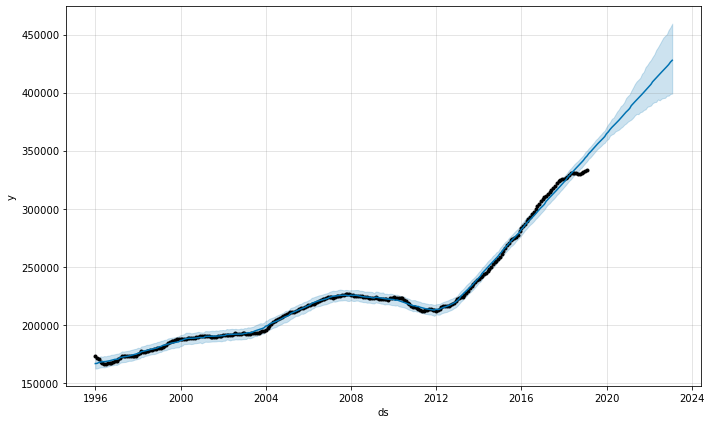

In [ ]:
modelt.plot(prophet_futuret);

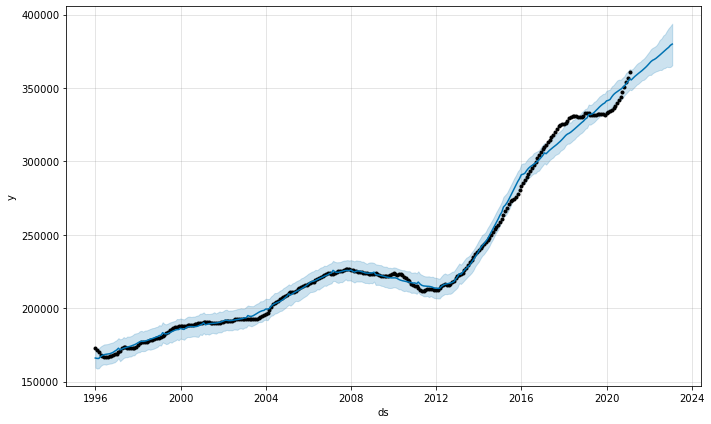

In [ ]:
model8.plot(prophet_future8);

In [ ]:
train_y

,ds,y
0,1996-01-01,173123.0
1,1996-02-01,171219.0
2,1996-03-01,170212.0
3,1996-04-01,168119.0
4,1996-05-01,167285.0
...,...,...
273,2018-10-01,330286.0
274,2018-11-01,330500.0
275,2018-12-01,331251.0
276,2019-01-01,332712.0
